https://github.com/qpv-research-group/solcore5/blob/develop/examples/Materials_Eg_vs_lattice_constant.py

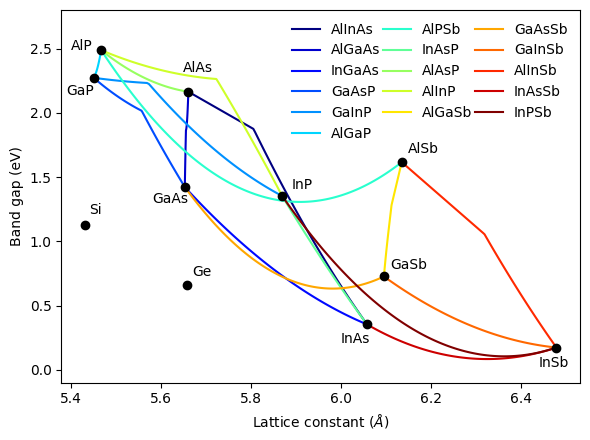

In [1]:
from solcore import material
from solcore import si, asUnit

import numpy as np
import matplotlib.pyplot as plt

# This is the list of materials available in Solcore... yes, it could be obtained in a more automated way.
mat = ['AlInAs','AlGaAs','InGaAs', 'GaAsP','GaInP','AlGaP','AlPSb','InAsP','AlAsP','AlInP','AlGaSb','GaAsSb','GaInSb','AlInSb','InAsSb','InPSb']

# The element that varies the composition
xx = ['Al','Al','In','P','In','Ga','Sb','As','As','Al','Al','Sb','In','In','Sb','Sb']

# And the labels for the binary compounds
mat2 = ['GaAs', 'AlAs', 'InAs', 'InSb', 'GaSb', 'AlSb', 'GaP', 'InP', 'AlP', 'Si', 'Ge']
pos = [(5.58, 1.3), (5.65, 2.32), (6, 0.21), (6.44, 0.02), (6.11, 0.788), (6.15, 1.69), (5.39, 2.14), (5.89, 1.41), (5.40, 2.49), (5.44, 1.21), (5.67, 0.73)]

zz = np.linspace(0, 1, 100)
lat = np.zeros_like(zz)
eg = np.zeros_like(zz)

colors = plt.cm.jet(np.linspace(0,1,len(mat)))

fig = plt.figure(figsize=(6,4.5))
ax = fig.add_subplot(111)

for j, (m, x) in enumerate(zip(mat, xx)):
    for i, z in enumerate(zz):
        param = {x : z}
        new_mat = material(m)(T=300, **param)

        lat[i] = new_mat.lattice_constant*1e10
        eg[i] = asUnit(new_mat.band_gap, 'eV')

    ax.plot(lat, eg, label=m, color=colors[j])

lat2 = []
eg2 = []
for (m, p) in zip(mat2, pos):
    new_mat = material(m)(T=300)

    lat2.append(new_mat.lattice_constant*1e10)
    eg2.append(asUnit(new_mat.band_gap, 'eV'))

    ax.annotate(m, xy=p)

plt.plot(lat2, eg2, 'ko')

plt.ylim(-0.1, 2.8)

plt.ylabel('Band gap (eV)')
plt.xlabel('Lattice constant ($\AA$)')
plt.legend(ncol=3, loc="upper right", frameon=False, columnspacing=0.2)
plt.tight_layout()

plt.show()